### Linear Regression and Learning Curve challenges

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
import patsy
from statsmodels.tools.eval_measures import mse, rmse, aic
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
fake_X = np.random.random_sample(200,)*100
fake_df = pd.DataFrame(data=[fake_X, (22.5 + 3.2*np.log(fake_X)) + (np.random.random_sample(200,)-0.5)]).T
fake_df.columns = ['X_true', 'y_true']
fake_df.head()

,X_true,y_true
0,71.522359,35.773648
1,80.535721,36.503179
2,98.093208,37.008836
3,96.468259,36.760479
4,98.590876,37.036520


In [3]:
# 2nd Order Polynomial
fake_df['X_true_sq'] = fake_df['X_true']**2
y, X = patsy.dmatrices('y_true ~ X_true_sq + X_true', data=fake_df, return_type='dataframe')

model = sm.OLS(y, X)
res = model.fit()
y_pred = res.predict(X)

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_true   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     594.2
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           3.64e-84
Time:                        21:05:30   Log-Likelihood:                -327.00
No. Observations:                 200   AIC:                             660.0
Df Residuals:                     197   BIC:                             669.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.2497      0.273     96.174      0.000      25.711      26.788
X_true_sq     -0.0017      0.000    -14.247      0.000      -0.002      -0.001
X_true         0.2649      0.012     21.753      0.000       0.241       0.289
==============================================================================
Omnibus:                      182.877   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3340.958
Skew:                          -3.501   Prob(JB):                         0.00
Kurtosis:                      21.758   Cond. No.                     1.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

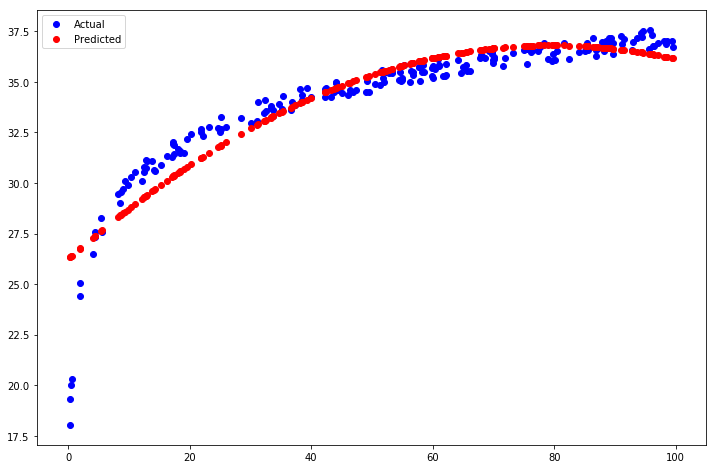

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(X['X_true'], y, label='Actual', c='b')
plt.scatter(X['X_true'], y_pred, label='Predicted', c='r')
plt.legend();

In [5]:
# Log
y, X = patsy.dmatrices('y_true ~ np.log(X_true)', data=fake_df, return_type='dataframe')

model = sm.OLS(y, X)
res = model.fit()
y_pred = res.predict(X)

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_true   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.541e+04
Date:                Sun, 28 Jan 2018   Prob (F-statistic):          4.96e-211
Time:                        21:05:31   Log-Likelihood:                -35.812
No. Observations:                 200   AIC:                             75.62
Df Residuals:                     198   BIC:                             82.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.5069      0.076    295.816      0.000      22.357      22.657
np.log(X_true)     3.1962      0.020    159.404      0.000       3.157       3.236
==============================================================================
Omnibus:                       95.330   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.156
Skew:                          -0.037   Prob(JB):                      0.00229
Kurtosis:                       1.794   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

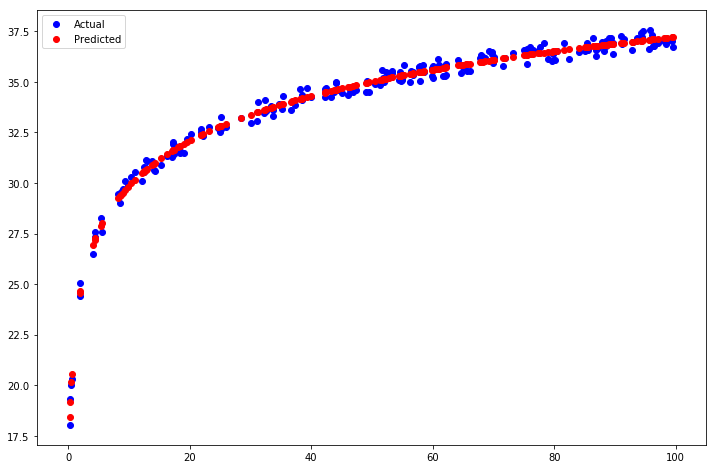

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X['np.log(X_true)'].apply(np.exp), y, label='Actual', c='b')
plt.scatter(X['np.log(X_true)'].apply(np.exp), y_pred, label='Predicted', c='r')
plt.legend();

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [7]:
fake_X = np.random.random_sample(200,)*100
fake_df = pd.DataFrame(data=[fake_X, (5.8 + 2*fake_X + .04*fake_X**2) + (np.random.random_sample(200,)-0.5)]).T
fake_df.columns = ['X_true', 'y_true']
fake_df.head()

,X_true,y_true
0,12.243638,35.947115
1,64.921861,304.501002
2,6.160140,19.863627
3,83.430056,450.628360
4,6.145388,19.760768


In [8]:
# 2nd Order Polynomial
fake_df['X_true_sq'] = fake_df['X_true']**2
y, X = patsy.dmatrices('y_true ~ X_true_sq + X_true', data=fake_df, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = sm.OLS(y_train, X_train)
res = model.fit()

In [9]:
y_pred = res.predict(X_train)
mean_squared_error(y_train, y_pred)

0.081012450061574828

In [10]:
y_pred = res.predict(X_test)
mean_squared_error(y_test, y_pred)

0.085830978743474673

##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(0, 5)

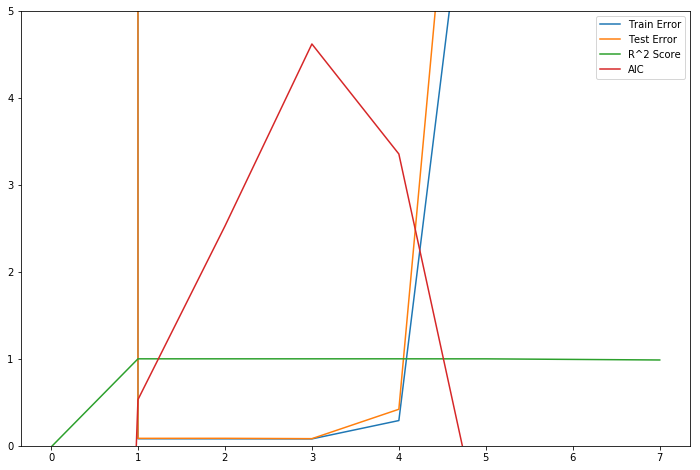

In [11]:
X.drop(['X_true_sq', 'Intercept'], axis=1, inplace=True)
plt.figure(figsize=(12,8))
train_error = []
test_error = []
r2 = []
aic = []
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    k = degree + 1
    train_error.append(mean_squared_error(y_train['y_true'], est.predict(X_train)))
    test_error.append(mean_squared_error(y_test['y_true'], est.predict(X_test)))
    r2.append(r2_score(y_test['y_true'], est.predict(X_test)))
    aic.append(2*k - 2*np.log(np.sum((y_test - est.predict(X_test))**2)))
plt.plot(range(8), train_error, label = 'Train Error')
plt.plot(range(8), test_error, label = 'Test Error')
plt.plot(range(8), r2, label = 'R^2 Score')
plt.plot(range(8), aic, label = 'AIC')
plt.legend()
plt.ylim(0, 5)
# plt.semilogy();

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

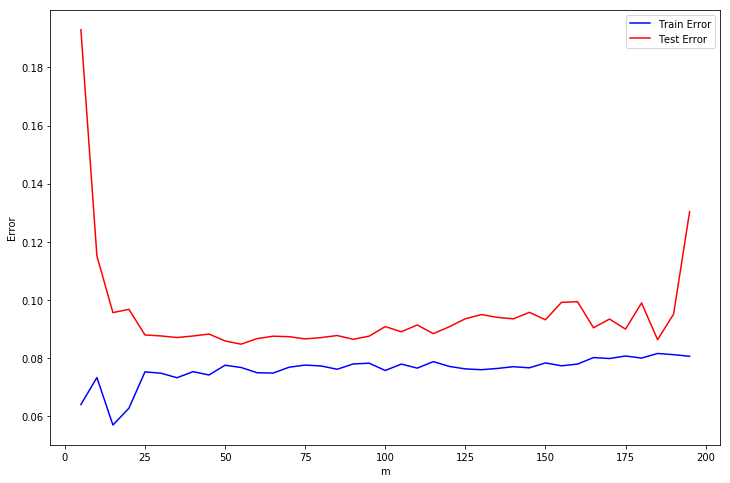

In [13]:
plt.figure(figsize=(12,8))
train_error = []
test_error = []
m_vals = []
for m in range(5, len(y), 5):
    X_train, y_train = X[:m], y[:m]
    X_test, y_test = X[m:], y[m:]
    est = make_pipeline(PolynomialFeatures(2), LinearRegression())
    est.fit(X_train, y_train)
    m_vals.append(m)
    train_error.append(mean_squared_error(y_train['y_true'], est.predict(X_train)))
    test_error.append(mean_squared_error(y_test['y_true'], est.predict(X_test)))
plt.plot(m_vals, train_error, c='b', label='Train Error')
plt.plot(m_vals, test_error, c='r', label='Test Error')
plt.legend();
plt.xlabel('m')
plt.ylabel('Error')